In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


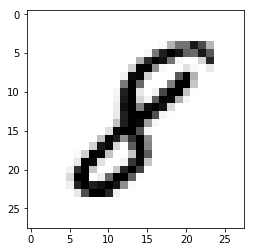

In [4]:
import matplotlib.pyplot as plt
image_index=7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#Reshaping the array to 4 dims so that it can work with keras API
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('x_train_shape: ',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train_shape:  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


##Building the Neural Network

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Creating a sequential Model and adding the layers
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0,2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 37s 620us/step - loss: 0.1831 - acc: 0.9468
Epoch 2/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0646 - acc: 0.9803
Epoch 3/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0390 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0265 - acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 42s 695us/step - loss: 0.0194 - acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0132 - acc: 0.9955
Epoch 7/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.0119 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0099 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.0085 - acc: 0.9972
Epoch 10/10
60000/60000 [=========

In [10]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 187us/step


[0.0869007722366634, 0.9799]